Проектная работа по модулю “Математика и статистика в Python”
1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [20]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

In [120]:
# 1.Загрузить файл hr.csv.
df = pd.read_csv('HR.csv')
#df.info()
# типы данных соответсвтуют
#df.isnull().sum()
# пустые значения отсутствуют
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [177]:
#переменные строкового типа приводим sales, salary приводим к численному значению, чтобы можно было посчитать корелляцию и применить в дереве решений
def fsalary(row):
    if (row['salary'] == 'low'):
        return 0
    if (row['salary'] == 'medium'):
        return 1
    if (row['salary'] == 'high'):
        return 2
def fsales(row):
    if (row['sales'] == 'sales'):
        return 0
    if (row['sales'] == 'technical'):
        return 1
    if (row['sales'] == 'support'):
        return 2
    if (row['sales'] == 'IT'):
        return 3
    if (row['sales'] == 'product_mng'):
        return 4
    if (row['sales'] == 'marketing'):
        return 5
    if (row['sales'] == 'RandD'):
        return 6
    if (row['sales'] == 'accounting'):
        return 7
    if (row['sales'] == 'hr'):
        return 8
    if (row['sales'] == 'management'):
        return 9
        
df['msalary'] = df.apply(fsalary, axis = 1)
df['msales'] = df.apply(fsales, axis = 1)

df.drop(['sales', 'salary'], axis = 1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,msalary,msales
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0
2,0.11,0.88,7,272,4,0,1,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,2
14995,0.37,0.48,2,160,3,0,1,0,0,2
14996,0.37,0.53,2,143,3,0,1,0,0,2
14997,0.11,0.96,6,280,4,0,1,0,0,2


In [180]:
#проведем очистку и нормализацию данных
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df_lim = df.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'msalary', 'msales']]
np_scaled = min_max_scaler.fit_transform(df_lim)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()
#plt.scatter(df_lim['average_montly_hours'], df_lim['number_project'])
headers = df.columns.values[:10]
headers
df_norm.columns = headers
df_norm

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.000000
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,0.0,-1.000000
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,0.0,-1.000000
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.000000
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...
14994,-0.318681,-0.34375,-1.0,-0.485981,-0.75,-1.0,1.0,-1.0,-1.0,-0.555556
14995,-0.384615,-0.62500,-1.0,-0.401869,-0.75,-1.0,1.0,-1.0,-1.0,-0.555556
14996,-0.384615,-0.46875,-1.0,-0.560748,-0.75,-1.0,1.0,-1.0,-1.0,-0.555556
14997,-0.956044,0.87500,0.6,0.719626,-0.50,-1.0,1.0,-1.0,-1.0,-0.555556


Посмотрим боксплот, чтобы оценить наличие выбросов. Видим только параметр time_spend_company имеет выбросы. Это значения > 0 в нормализованной системе координат. Если посмотреть на ненормализованные эти значения, то окажется, что туда почти полностью попадают данные о работниках со стажем 6-10 лет, имеющих интересную статистику, отличную от сотрудников с меньшим стажем. Эти "выбросы" удалять не будем, так как они содержат ценые даные (под боксплотом есть визуализация в виде гистограммы).
Также имеется три последних параметра-класса с бинарными данными {0,1}.
Итого: считаем, что выбросов нет.

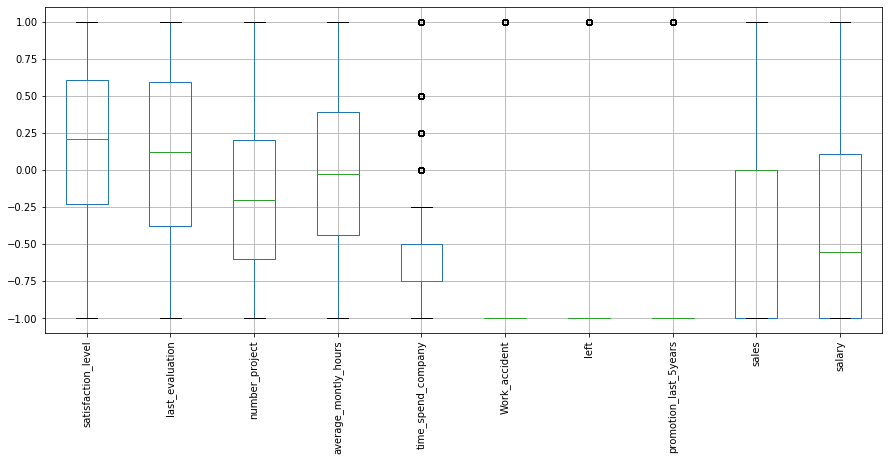

In [181]:
from pylab import *
boxplot = df_norm.boxplot(figsize=(15, 6), rot=90)

6     718
10    214
7     188
8     162
Name: time_spend_company, dtype: int64

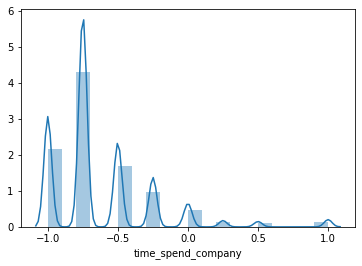

In [182]:
#df_norm[df_norm['time_spend_company'] <= 0]
sns.distplot(df_norm['time_spend_company'], bins = 20)
df[df_norm['time_spend_company'] >= 0]['time_spend_company'].value_counts()

In [22]:
# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

print('satisfaction_level:')
print('Медиана: ', statistics.median(df['satisfaction_level']))
print('Мода: ', statistics.mode(df['satisfaction_level']))
print('Математическое ожидание: ', statistics.mean(df['satisfaction_level']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['satisfaction_level']))
print('Дисперсия: ', statistics.pvariance(df['satisfaction_level']))
print('Минимальное значение: ', df['satisfaction_level'].min())
print('Максимальное значение: ', df['satisfaction_level'].max())
print('Разброс: ', df['satisfaction_level'].max() - df['satisfaction_level'].min())

print('\nlast_evaluation:')
print('Медиана: ', statistics.median(df['last_evaluation']))
print('Мода: ', statistics.mode(df['last_evaluation']))
print('Математическое ожидание: ', statistics.mean(df['last_evaluation']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['last_evaluation']))
print('Дисперсия: ', statistics.pvariance(df['last_evaluation']))
print('Минимальное значение: ', df['last_evaluation'].min())
print('Максимальное значение: ', df['last_evaluation'].max())
print('Разброс: ', df['last_evaluation'].max() - df['last_evaluation'].min())

print('\nnumber_project:')
print('Медиана: ', statistics.median(df['number_project']))
print('Мода: ', statistics.mode(df['number_project']))
print('Математическое ожидание: ', statistics.mean(df['number_project']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['number_project']))
print('Дисперсия: ', statistics.pvariance(df['number_project']))
print('Минимальное значение: ', df['number_project'].min())
print('Максимальное значение: ', df['number_project'].max())
print('Разброс: ', df['number_project'].max() - df['number_project'].min())

print('\naverage_montly_hours:')
print('Медиана: ', statistics.median(df['average_montly_hours']))
#print('Мода: ', statistics.mode(df['average_montly_hours']))
print('Две моды:', df['average_montly_hours'].value_counts()[0:1])
print('Математическое ожидание: ', statistics.mean(df['average_montly_hours']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['average_montly_hours']))
print('Дисперсия: ', statistics.pvariance(df['average_montly_hours']))
print('Минимальное значение: ', df['average_montly_hours'].min())
print('Максимальное значение: ', df['average_montly_hours'].max())
print('Разброс: ', df['average_montly_hours'].max() - df['average_montly_hours'].min())

print('\ntime_spend_company:')
print('Медиана: ', statistics.median(df['time_spend_company']))
print('Мода: ', statistics.mode(df['time_spend_company']))
print('Математическое ожидание: ', statistics.mean(df['time_spend_company']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['time_spend_company']))
print('Дисперсия: ', statistics.pvariance(df['time_spend_company']))
print('Минимальное значение: ', df['time_spend_company'].min())
print('Максимальное значение: ', df['time_spend_company'].max())
print('Разброс: ', df['time_spend_company'].max() - df['time_spend_company'].min())

print('\nWork_accident:')
print('Медиана: ', statistics.median(df['Work_accident']))
print('Мода: ', statistics.mode(df['Work_accident']))
print('Математическое ожидание: ', statistics.mean(df['Work_accident']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['Work_accident']))
print('Дисперсия: ', statistics.pvariance(df['Work_accident']))
print('Минимальное значение: ', df['Work_accident'].min())
print('Максимальное значение: ', df['Work_accident'].max())
print('Разброс: ', df['Work_accident'].max() - df['Work_accident'].min())

print('\nleft:')
print('Медиана: ', statistics.median(df['left']))
print('Мода: ', statistics.mode(df['left']))
print('Математическое ожидание: ', statistics.mean(df['left']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['left']))
print('Дисперсия: ', statistics.pvariance(df['left']))
print('Минимальное значение: ', df['left'].min())
print('Максимальное значение: ', df['left'].max())
print('Разброс: ', df['left'].max() - df['left'].min())

print('\npromotion_last_5years:')
print('Медиана: ', statistics.median(df['promotion_last_5years']))
print('Мода: ', statistics.mode(df['promotion_last_5years']))
print('Математическое ожидание: ', statistics.mean(df['promotion_last_5years']))
print('Среднеквадратическое отклонение: ', statistics.pstdev(df['promotion_last_5years']))
print('Дисперсия: ', statistics.pvariance(df['promotion_last_5years']))
print('Минимальное значение: ', df['promotion_last_5years'].min())
print('Максимальное значение: ', df['promotion_last_5years'].max())
print('Разброс: ', df['promotion_last_5years'].max() - df['promotion_last_5years'].min())

#не ммысла считать статистические характеристики для Sales и salary, так как категории

satisfaction_level:
Медиана:  0.64
Мода:  0.1
Математическое ожидание:  0.6128335222348157
Среднеквадратическое отклонение:  0.2486223626820733
Дисперсия:  0.061813079225616394
Минимальное значение:  0.09
Максимальное значение:  1.0
Разброс:  0.91

last_evaluation:
Медиана:  0.72
Мода:  0.55
Математическое ожидание:  0.7161017401160077
Среднеквадратическое отклонение:  0.1711634045107436
Дисперсия:  0.029296911043708445
Минимальное значение:  0.36
Максимальное значение:  1.0
Разброс:  0.64

number_project:
Медиана:  4
Мода:  4
Математическое ожидание:  3.80305353690246
Среднеквадратическое отклонение:  1.2325512654823438
Дисперсия:  1.5191826220421274
Минимальное значение:  2
Максимальное значение:  7
Разброс:  5

average_montly_hours:
Медиана:  200
Две моды: 156    153
Name: average_montly_hours, dtype: int64
Математическое ожидание:  201.0503366891126
Среднеквадратическое отклонение:  49.94143446256218
Дисперсия:  2494.146876178393
Минимальное значение:  96
Максимальное значение:  31

In [ ]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных

методом Пирсона (линейный коэффициент корелляции), что не очень корректно, так как ни одна из выборок не имеет нормального распределения

Text(0.5, 1, 'Корелляция Пирсона')

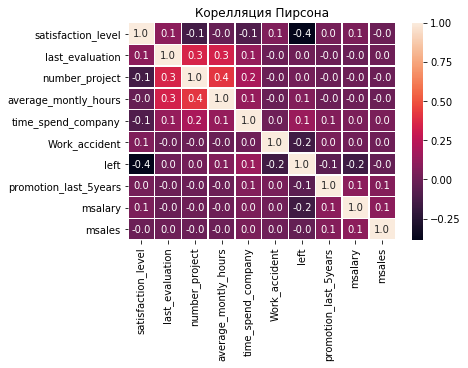

In [152]:
ax = sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.5)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
ax.set_title('Корелляция Пирсона')

Более правильно использовать метод Кендалла или Спирмана (непараметрические методы)

Text(0.5, 1, 'Корелляция Спирмана')

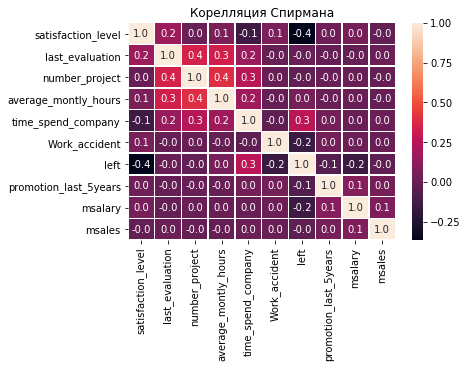

In [154]:
#Метод Спирмана:
ax1 = sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".1f", linewidths=.5)
i, k = ax1.get_ylim()
ax1.set_ylim(i+0.5, k-0.5)
ax1.set_title('Корелляция Спирмана')

Text(0.5, 1, 'Корелляция Кендалла')

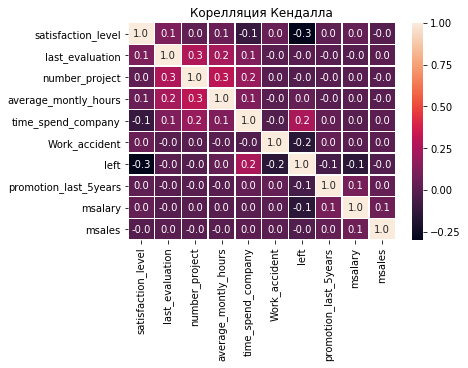

In [166]:
#Метод Кендалла
ax1 = sns.heatmap(df.corr(method='kendall'), annot=True, fmt=".1f", linewidths=.5)
i, k = ax1.get_ylim()
ax1.set_ylim(i+0.5, k-0.5)
ax1.set_title('Корелляция Кендалла')

In [165]:
#Выведем коэффициент Кендалла и уровень значимости, чотбы определить, что измерения статистически значимы
from scipy.stats import kendalltau

headers = df.columns.values
headers

for i in headers:
    for j in headers:
        stat, p = kendalltau(df[i], df[j])
        print(i, ' ', j, ' ', stat, p)

satisfaction_level   satisfaction_level   0.9999999999999998 0.0
satisfaction_level   last_evaluation   0.11386500035281856 2.720602215582635e-94
satisfaction_level   number_project   0.02207680708694241 0.0002595907981087753
satisfaction_level   average_montly_hours   0.05112578059421947 1.3770320825606148e-20
satisfaction_level   time_spend_company   -0.11000460064706605 1.9492588333750248e-72
satisfaction_level   Work_accident   0.04629810991682001 5.24280821116895e-12
satisfaction_level   left   -0.30067517457448134 0.0
satisfaction_level   promotion_last_5years   0.018332288788823807 0.006301253323118004
satisfaction_level   sales   0.0018156575181417468 0.7568160070106038
satisfaction_level   salary   0.014924463274838033 0.021762750272763642
satisfaction_level   msalary   0.03606881737742267 2.9359955426186733e-08
satisfaction_level   msales   -0.006389251432561257 0.27584455248815964
last_evaluation   satisfaction_level   0.11386500035281857 2.720602215582635e-94
last_evaluatio

salary   msalary   0.4695256170175903 0.0
salary   msales   -0.016355393952568194 0.018011750623586478
msalary   satisfaction_level   0.03606881737742267 2.9359955426186733e-08
msalary   last_evaluation   -0.007294370702695334 0.26311024665718397
msalary   number_project   0.0038550577848250702 0.5886097046334262
msalary   average_montly_hours   0.001896003833128291 0.7698847887531701
msalary   time_spend_company   0.0012500392498352578 0.8623006722149271
msalary   Work_accident   0.008234485312168128 0.29812414179362445
msalary   left   -0.14758020015457898 1.325030698410141e-77
msalary   promotion_last_5years   0.09137169807270534 7.803436466515395e-31
msalary   sales   -0.039451495799733886 1.1592129791351728e-08
msalary   salary   0.4695256170175903 0.0
msalary   msalary   1.0 0.0
msalary   msales   0.061923141399777865 3.380472991505203e-19
msales   satisfaction_level   -0.006389251432561256 0.27584455248815964
msales   last_evaluation   0.006988270048244482 0.23430092219619447
ms

Рассматрим корелляцию методом Кендалла для параметра left с другими парамерами, где видим:
- наибольшая (по модулю) обратная связь 0.3 с уровнем удовлетворенности satisfaction_level. p-value=0 значит можем принять   гипотезу о зависимости переменнх (отклонить нулевую гипотезу об отсутсвии зависимости между переменными). 
- обратная связь 0.2 с инцидентами work_accident, случившимися на работе, p-value~0, принимаем гипотезу о связи между переменными 
- обратная связь 0.1 с уровнем зарплаты salary, p-value=0.003 (<0.05) принимаем гипотезу о связи между переменными 
- обратная связь 0.1 с повышением в последние 5 лет promotion_last_5_years, p-value~0 принимаем гипотезу о связи между переменными 
- прямая связь 0.2 от стажа time_spend_company, p-value~0 принимаем гипотезу о связи между переменными 
Связь между переменными почти отсутствует (требуется >0.95)

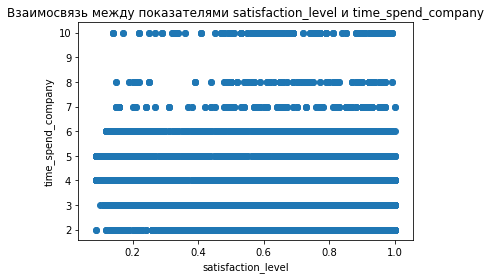

In [242]:
# 4.Визуализировать несколько взаимосвязей между переменными.
# можно вручную для каждого (приведем только один пример), но лучше вторым способм через regplot
plt.title('Взаимосвязь между показателями satisfaction_level и time_spend_company')
plt.xlabel('satisfaction_level')
plt.ylabel('time_spend_company')
plt.scatter(df['satisfaction_level'], df['time_spend_company'])

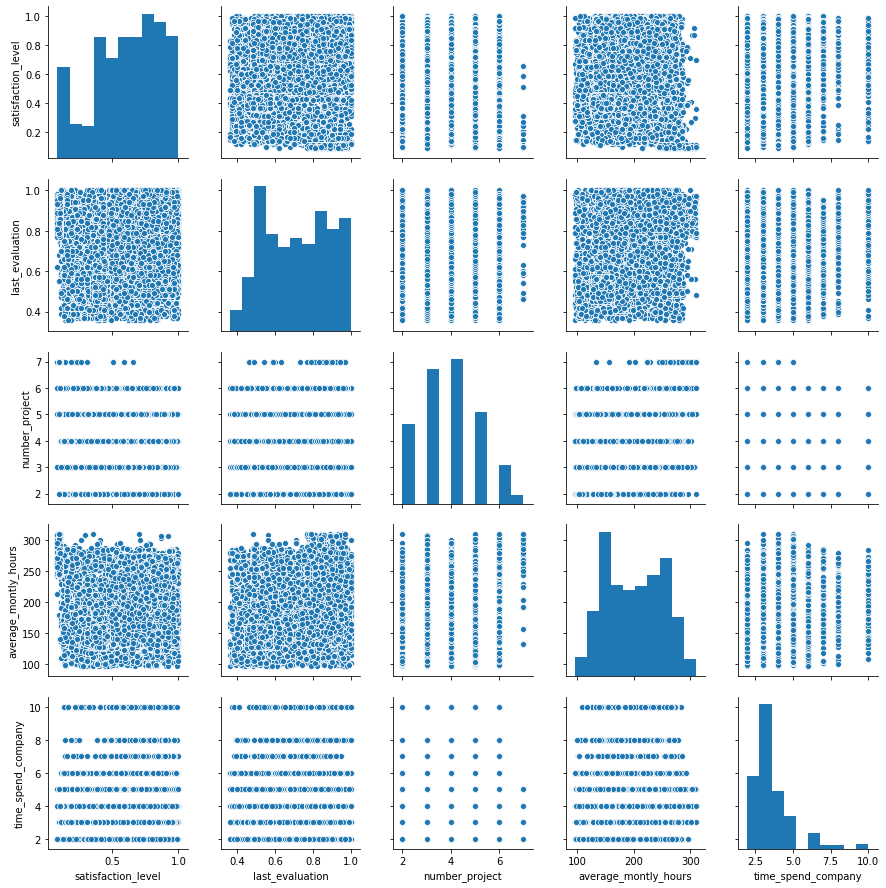

In [241]:
#второй способ
sns.pairplot(df.loc[:,['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
plt.show()


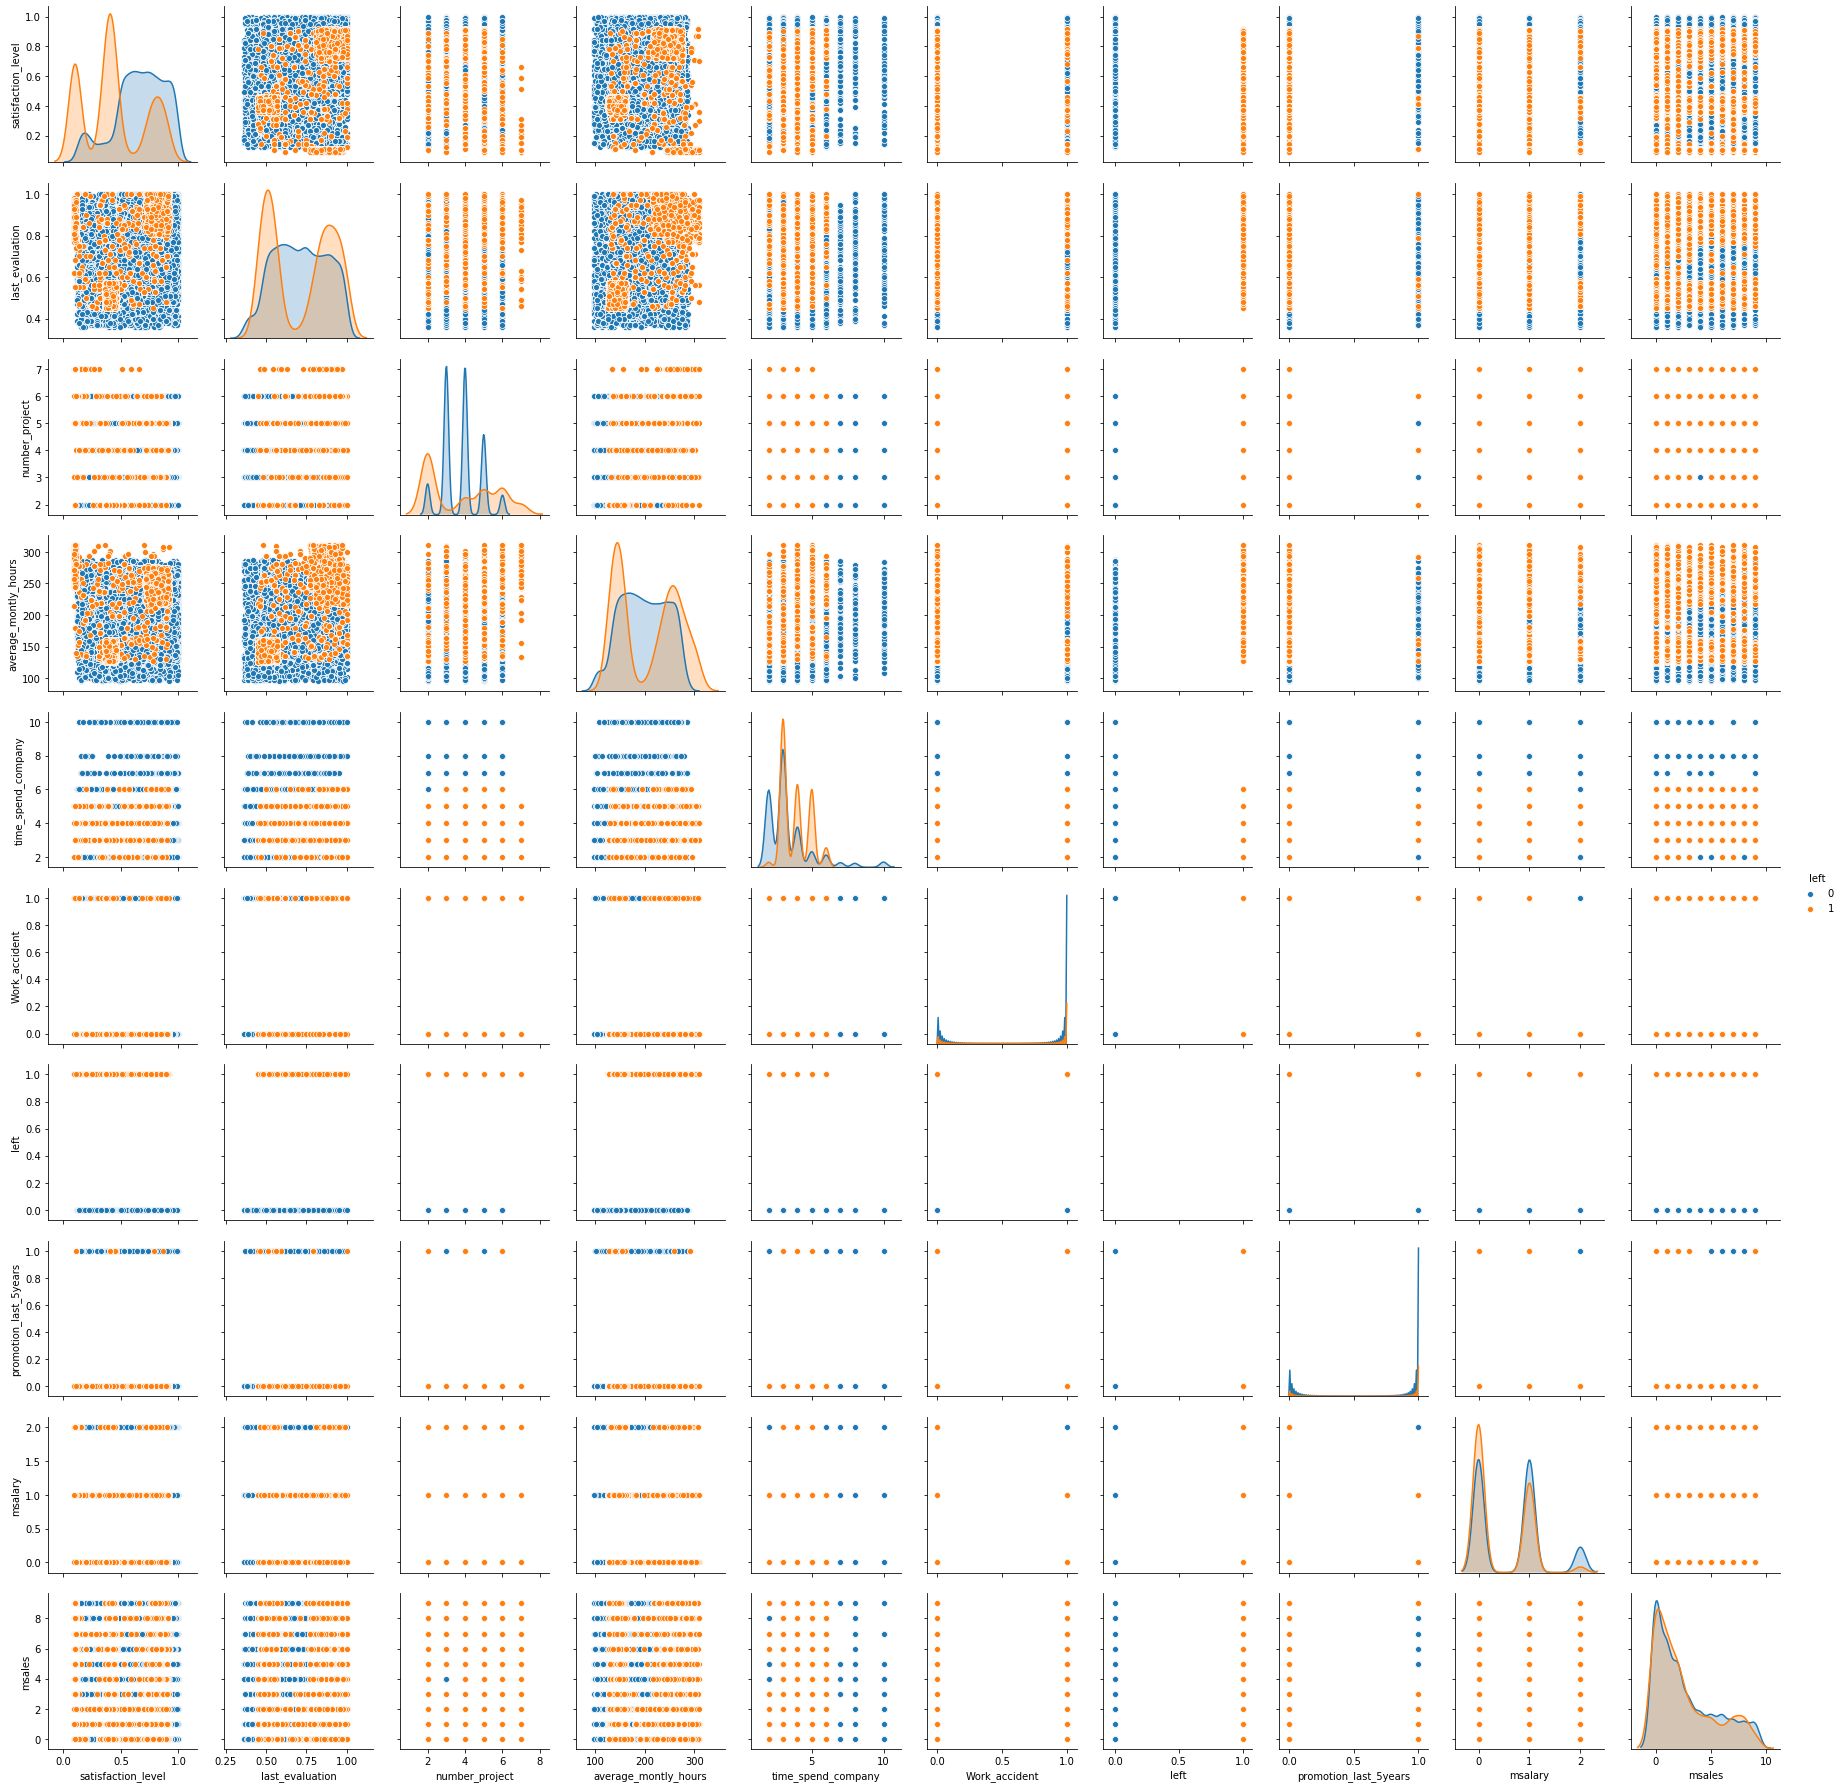

In [240]:
#визуализируем взаимосвязи по классам left = 1(уволился), left = 0 (работает)
sns.pairplot(df, hue='left')
plt.show()
#синий - работающие, оранжевый - уволившиеся

Из первого и второго графика видно, что нет переменнях с линейными или нелинейными связями. Корелляция отсутсвтует.
Из второго графика видно:
 - уволившиеся сотрдуники имеют стаж от 2-6 лет. выше 6ти лет никто особо не увольняется;
 - уволившиеся - это сотрудники, работающие больше 140 часов в месяц
 - вероятность что человек уволится больше при наличии инцидентов, чем если их нет. но не значительно;
 - сравнивая satisfaction_level и last_evaluation видно несколько групп: група с низкой удовлетворенностью и оценкой ниже среднего, группа с высокой удовлетворенностью и оценкой вывше средлней, группа "разочаровавшихся", но с оценкой выше среднего
 - сравнивая average_monthly_hours satisfaction_level схожая картинка с предыдущим пунктом где видно несколько групп: группа сотрудкниов, работающих от 120-180 часов в месяц имеют низкую удовлетворенность и группа работающая более 200 часов в месяц и имеющая высокую удовлетворенность

Text(0.5, 1.0, 'Work_accident')

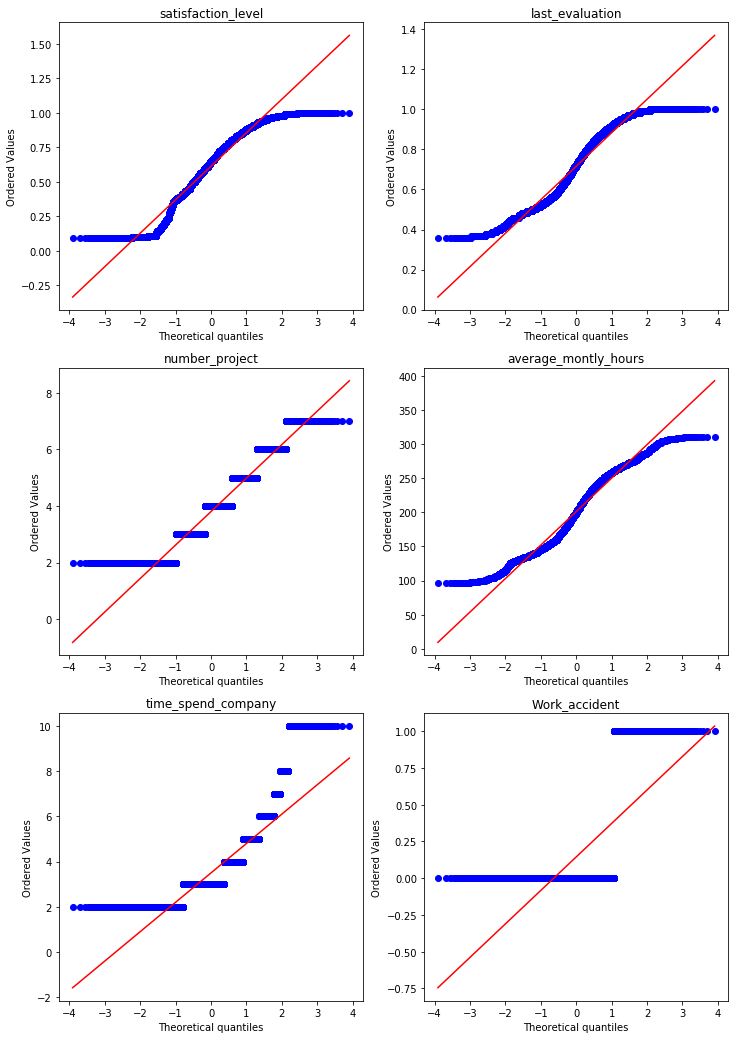

In [262]:
#построим Q-Q plot, чтобы оценить нормальость распрееления параметров

plt.figure(figsize=(12,18))
ax = plt.subplot(3,2,1)
stats.probplot(df['satisfaction_level'], dist='norm', plot=plt)
ax.set_title('satisfaction_level')
ax = plt.subplot(3,2,2)
stats.probplot(df['last_evaluation'], dist='norm', plot=plt)
ax.set_title('last_evaluation')
ax = plt.subplot(3,2,3)
stats.probplot(df['number_project'], dist='norm', plot=plt)
ax.set_title('number_project')
ax = plt.subplot(3,2,4)
stats.probplot(df['average_montly_hours'], dist='norm', plot=plt)
ax.set_title('average_montly_hours')
ax = plt.subplot(3,2,5)
stats.probplot(df['time_spend_company'], dist='norm', plot=plt)
ax.set_title('time_spend_company')
ax = plt.subplot(3,2,6)
stats.probplot(df['Work_accident'], dist='norm', plot=plt)
ax.set_title('Work_accident')

Из графиков QQ-plot, что ни один параметр не похож на нормальное распределение. Satisfaction_level, last_evaluation, average_monthly-hours немного похожи, но по краям отличаются в меньшую сторону по частоте по сравнению с нормальным отклонением

In [ ]:
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

t-test - это одновыборочный критерий Стьюдента, служащий для проверки гипотезы о том, что среднее некоторой выборки "равно" заданному среднему целевому значению (например средне генерально совоккупности).
Необходимым условием является то, что выборка имеет нормальное распредление (но в принципе работает не немного для недонормального распредления). 
Но исходя из графика regplot ни одно распределение параметра не похоже на нормальное. Поэтому используем t-test очень аккуратно  в сочетании с непараметрическими тестами.

Проверим как связаны значения удовлетворенности у сотрудников (satisfaction_level), имевших повышение по служебной лестнице и без (promotion_last_5years).

Поверка на нормальность распределения параметров:
С повышением:  NormaltestResult(statistic=17.072086980310754, pvalue=0.0001962652514050715) не нормальное
Генеральная совокупность:  NormaltestResult(statistic=1200.9584504966565, pvalue=1.6412924703269606e-261) не нормальное

Результаты t-теста для выборки сорудников с повышением за последние 5 лет:  Ttest_1sampResult(statistic=3.62989484546297, pvalue=0.0003302960768113862)
Средее значение выборки уровня удовлетворенности у повышенных сотрудников:  0.6560188087774291 0.6560188087774291

Вывод: p-value значительно ниже уровня значимости 0.05, таким образом можем утверждать о статистической значимости выборок (отвергнуть нулевую гипотезу), то есть средняя удовлетворенность у повышенных по службе сотрдуников выше чем в среднем по компании


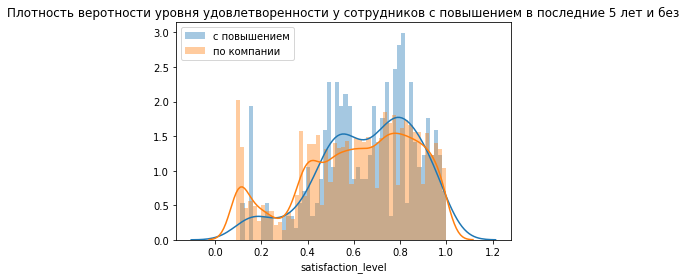

In [250]:
prom = df[df['promotion_last_5years'] == 1]['satisfaction_level']
gen = df['satisfaction_level']

# проверим распределение на нормальность:
print('Поверка на нормальность распределения параметров:')
print('С повышением: ', stats.normaltest(prom), 'не нормальное')
print('Генеральная совокупность: ', stats.normaltest(gen), 'не нормальное\n')

print('Результаты t-теста для выборки сорудников с повышением за последние 5 лет: ', stats.ttest_1samp(prom, gen.mean()))
print('Средее значение выборки уровня удовлетворенности у повышенных сотрудников: ', prom.mean(), df[df['promotion_last_5years'] == 1]['satisfaction_level'].mean())
print('\nВывод: p-value значительно ниже уровня значимости 0.05, таким образом можем утверждать о статистической значимости выборок (отвергнуть нулевую гипотезу), то есть средняя удовлетворенность у повышенных по службе сотрдуников выше чем в среднем по компании')

sns.distplot(prom, 50)
sns.distplot(gen, 50)
plt.title('Плотность веротности уровня удовлетворенности у сотрудников с повышением в последние 5 лет и без')
plt.legend(['с повышением', 'по компании'])

Проверим как связаны значения удовлетворенности у сотрудников (satisfaction_level), имевших повышение по служебной лестнице и без (promotion_last_5years).
В t-test нулевая гипотеза - уровень удовлетворенности людей с повышением в должности не влияет на уровень удовлетвоернности, то есть сердние выборок с повышением по службе и без могут 
#альтернативная гипотеза - после повышения должности уровень удовлетвоернности изменятся

Поверка на нормальность распределения параметров:
С повышением:  NormaltestResult(statistic=17.072086980310754, pvalue=0.0001962652514050715) не нормальное
Без повышением:  NormaltestResult(statistic=1201.4369598676299, pvalue=1.2920490094231066e-261) не нормальное

Результаты t-теста для выборок удовлетворености с повышениеми и без:  Ttest_indResult(statistic=3.1366967917856816, pvalue=0.0017119316267238923)
Средее значение выборки уровня удовлетворенности у повышенных сотрудников:  0.6560188087774291 0.6560188087774291
Средее значение выборки уровня удовлетворенности у НЕ повышенных сотрудников:  0.6118950953678477 0.6118950953678477

Вывод: p-value значительно ниже уровня значимости 0.05, таким образом можем утверждать о статистической значимости выборок (отвергнуть нулевую гипотезу), то есть средняя удовлетворенность у повышенных по службе сотрдуников выше


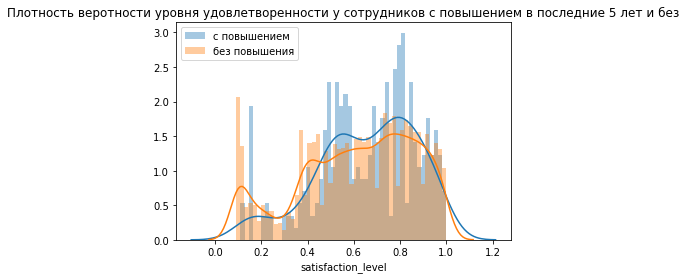

In [253]:
prom = df[df['promotion_last_5years'] == 1]['satisfaction_level']
not_prom = df[df['promotion_last_5years'] == 0]['satisfaction_level']
gen = df['satisfaction_level']

# проверим распределение на нормальность:
print('Поверка на нормальность распределения параметров:')
print('С повышением: ', stats.normaltest(prom), 'не нормальное')
print('Без повышением: ', stats.normaltest(not_prom), 'не нормальное\n')

print('Результаты t-теста для выборок удовлетворености с повышениеми и без: ', stats.ttest_ind(prom, not_prom))
print('Средее значение выборки уровня удовлетворенности у повышенных сотрудников: ', prom.mean(), df[df['promotion_last_5years'] == 1]['satisfaction_level'].mean())
print('Средее значение выборки уровня удовлетворенности у НЕ повышенных сотрудников: ', not_prom.mean(), df[df['promotion_last_5years'] == 0]['satisfaction_level'].mean())
print('\nВывод: p-value значительно ниже уровня значимости 0.05, таким образом можем утверждать о статистической значимости выборок (отвергнуть нулевую гипотезу), то есть средняя удовлетворенность у повышенных по службе сотрдуников выше')

sns.distplot(prom, 50)
sns.distplot(not_prom, 50)
plt.title('Плотность веротности уровня удовлетворенности у сотрудников с повышением в последние 5 лет и без')
plt.legend(['с повышением', 'без повышения'])

In [255]:
# Теперь применим непараметрический тест Манна-Уитни для вышеисследуемой гипотезы:

from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp

print(stats.mannwhitneyu(prom , not_prom, use_continuity=True, alternative='two-sided'))
print('Непараметрический тест Манна Уитни также показывает p-value <0,05, что означает, что данные статистически значимы')

print('\n',stats.ks_2samp(prom , not_prom, alternative='two-sided'))
print('Непараметрический тест Колмагорова-Смирнова также показывает p-value <0,05, что означает, что данные статистически значимы')

print('\nВывод: средняя удовлетворенность у повышенных по службе сотрдуников выше')

MannwhitneyuResult(statistic=2550438.5, pvalue=0.006301378312817667)
Непараметрический тест Манна Уитни также показывает p-value <0,05, что означает, что данные статистически значимы

 Ks_2sampResult(statistic=0.12159678149530634, pvalue=0.00019557826131252204)
Непараметрический тест Колмагорова-Смирнова также показывает p-value <0,05, что означает, что данные статистически значимы

Вывод: средняя удовлетворенность у повышенных по службе сотрдуников выше


Проверим как связаны значения среднее время работы в месяц (average_montly_hours), от ниличия инцидентов или без (Work_accident).
В t-test нулевая гипотеза - уровень удовлетворенности людей с повышением в должности не влияет на уровень удовлетвоернности, то есть сердние выборок с повышением по службе и без могут 
#альтернативная гипотеза - после повышения должности уровень удовлетвоернности изменятся

Результаты t-теста для выборок среднего времени работы в месяц с несчастными случаями и без:  Ttest_indResult(statistic=-1.2421846964457004, pvalue=0.21418784880707778)
Средее значение выборки времени работы в месяц с несчастными случаями:  199.81834946980175
Средее значение выборки времени работы в месяц БЕЗ несчастных случаев:  201.2586126266563

Вывод: p-value значительно выше уровня значимости 0.05, то есть группы статистически не отличаются. Не можем отвергнуть нулевую гипотезу. Поэтому средняя продолжительность работы в месяц не влияет на наличие инцидентов

MannwhitneyuResult(statistic=13775646.5, pvalue=0.4577571514091472)
Непараметрический тест Манна Уитни также показывает p-value >0,05, что означает, что данные статистически не значимы

 Ks_2sampResult(statistic=0.04337014122688909, pvalue=0.0018612001051294738)
Непараметрический тест Колмагорова-Смирнова показывает p-value <0,05, что означает, что данные статистически значимы


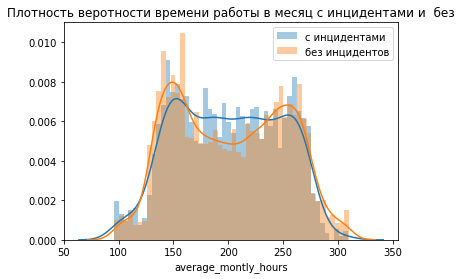

In [258]:
#Work_accident average_montly_hours
acc = df[df['Work_accident'] == 1]['average_montly_hours']
not_acc = df[df['Work_accident'] == 0]['average_montly_hours']
gen = df['average_montly_hours']
print('Результаты t-теста для выборок среднего времени работы в месяц с несчастными случаями и без: ', stats.ttest_ind(acc, not_acc))
print('Средее значение выборки времени работы в месяц с несчастными случаями: ', acc.mean())
print('Средее значение выборки времени работы в месяц БЕЗ несчастных случаев: ', not_acc.mean())
print('\nВывод: p-value значительно выше уровня значимости 0.05, то есть группы статистически не отличаются. Не можем отвергнуть нулевую гипотезу. Поэтому средняя продолжительность работы в месяц не влияет на наличие инцидентов\n')
sns.distplot(acc, 50)
sns.distplot(not_acc, 50)
plt.title('Плотность веротности времени работы в месяц с инцидентами и  без')
plt.legend(['с инцидентами', 'без инцидентов'])

print(stats.mannwhitneyu(acc, not_acc, use_continuity=True, alternative='two-sided'))
print('Непараметрический тест Манна Уитни также показывает p-value >0,05, что означает, что данные статистически не значимы')

print('\n',stats.ks_2samp(acc, not_acc, alternative='two-sided'))
print('Непараметрический тест Колмагорова-Смирнова показывает p-value <0,05, что означает, что данные статистически значимы')


Распределение сотрдуников по зарплатам:
 low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

Распределение сотрдуников по зарплатам:
 low       7316
medium    6446
high      1237
Name: salary, dtype: int64


Text(0.5, 0, 'Уровень зарплат')

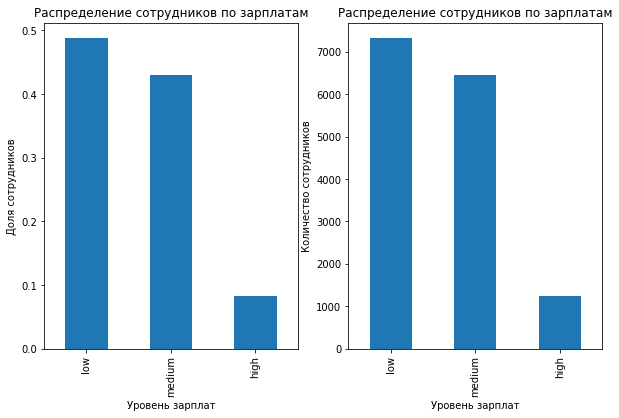

In [273]:
#7.Показать распределение сотрудников по зарплатам.
salary = df['salary'].value_counts(normalize=True)
print('Распределение сотрдуников по зарплатам:\n',salary)
ax = subplot(1,2,1)
ax = salary.plot(kind='bar', rot=90, figsize=(10, 6))
ax.set_title('Распределение сотрудников по зарплатам')
ax.set_ylabel('Доля сотрудников')
ax.set_xlabel('Уровень зарплат')
ax = subplot(1,2,2)
salary = df['salary'].value_counts()
print('\nРаспределение сотрдуников по зарплатам:\n',salary)
ax = salary.plot(kind='bar', rot=90, figsize=(10, 6))
ax.set_title('Распределение сотрудников по зарплатам')
ax.set_ylabel('Количество сотрудников')
ax.set_xlabel('Уровень зарплат')

In [274]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами.
df.loc[:,'employees'] = 1
piv = pd.pivot_table(df, values = ['employees'], index = ['sales'], columns = ['salary'], aggfunc='count')
piv

employees             
salary           high   low medium
sales                             
IT                 83   609    535
RandD              51   364    372
accounting         74   358    335
hr                 45   335    359
management        225   180    225
marketing          80   402    376
product_mng        68   451    383
sales             269  2099   1772
support           141  1146    942
technical         201  1372   1147

Text(0.5, 0, 'Отделы')

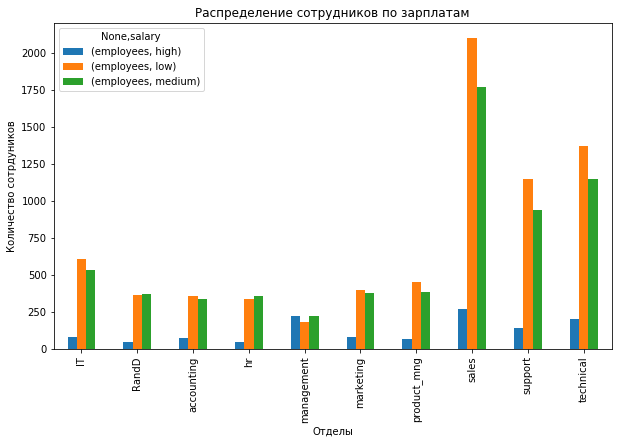

In [275]:
ax = piv.plot(kind='bar', rot=90, figsize=(10, 6))
ax.set_title('Распределение сотрудников по зарплатам')
ax.set_ylabel('Количество сотрдуников')
ax.set_xlabel('Отделы')

In [195]:
#9.Сколько сотрудников покинули компанию.
print('количество сотрдуников, покинувших компанию: ', len(df[df['left'] == 1]))

количество сотрдуников, покинувших компанию:  3571


In [277]:
#10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Проведем для начала анализ влияния признаков на класс уволившихя сотрудников (left=1) с помощью метода random forest.

In [278]:
from sklearn.model_selection import train_test_split

x = df.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'msalary', 'msales']]
y = df.loc[:, ['left']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

#обучаем модель
model.fit(x_train, y_train)

C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [279]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_, index = headers).sort_values(ascending = False)
feature_imp

satisfaction_level       0.335481
number_project           0.196455
time_spend_company       0.177205
average_montly_hours     0.150943
last_evaluation          0.111146
msales                   0.012305
msalary                  0.009362
Work_accident            0.005988
promotion_last_5years    0.001117
dtype: float64

В резульате получаем список призаков, отсортированный порядке от наибольшей значимости (влияния) призанка к менее значимой. 
Наиболее влиятельными на уволившихся сотрудников в топ3 оказались satisfaction_level, time_spend_company (профессиональное выгорание), number_project (связано с average_montly_hours и означает очень высокую нагрузку на сотрдуников). Проверим влияние признаков на класс уволившихся сотрудников ниже с помощью статистических критериев.

Ниже оцениваем точность предсказания модели. В нашем случае точность (precision) равна 99% для обоих классов (работающие и уволившиеся), то есть 99% опознанных моделью как определнный класс данных действительно таковыми и являются. Если говорить про полноту данных (recall), то также имеет достаточно высокое значение от 97-100%, то есть  из всех смэплов определенного класса модель нашла не менее 97%. Это говорит о очень высокой предсказательной способности модели.

In [280]:
from sklearn.metrics import classification_report
model_prediction = model.predict(x_test)
print(classification_report(y_test, model_prediction))
model2.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3418
           1       0.99      0.96      0.98      1082

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



0.9973333333333333

Вывод: оценка не влияла на увольнение (принимаем нуевую гипотезу, так как P-value>0.05). Но это неоднозначный вывод, так как из графика по уволившимся сотрдуникам видно, что есть характерные два участка с высокой оценкой (возможно ушли сами) и низкой оценкой (возможно были уволены).

MannwhitneyuResult(statistic=20337201.0, pvalue=0.7650349266478002)


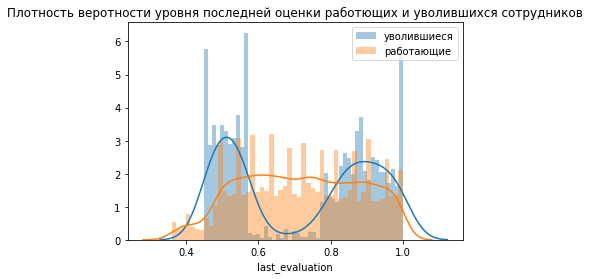

In [293]:
# проверим гипотезу, что уволившиеся сотрудники имели низкую оценку  (то есть это не было сокращение = низкая оценка)
# нулевая гипотеза - выборки уровней последней оценки у уволившихся сотрудников и работающих  - одинаковы. То есть оценка не связана с увольнением.
# альтернативная гипотеза - выборки уровней удовлетворенности  не схожи (средние значения не совпадают).
left_ev = df[df['left'] == 1]['last_evaluation']
onboard_ev = df[df['left'] == 0]['last_evaluation']

from scipy.stats import mannwhitneyu

print(stats.mannwhitneyu(left_ev, onboard_ev, use_continuity=True, alternative='two-sided'))
sns.distplot(left_ev, 50)
sns.distplot(onboard_ev, 50)
plt.title('Плотность веротности уровня последней оценки работющих и уволившихся сотрудников')
plt.legend(['уволившиеся', 'работающие'])

Из графика видно, что сотрудники, работающие много получили высокую оценку. Сотрудники, работчющие в 2 раза меньше, получили низку оценку.

In [326]:
#рассмотрим как влияла нагрузка в месяц в часах time_spend_company на уволившихся сотрудников
wl = df.groupby(['time_spend_company', 'left']).agg(['mean','count']).loc[:, ['average_montly_hours', 'employee']]
wl

average_montly_hours      
                                        mean count
time_spend_company left                           
2                  0              199.956440  3191
                   1              210.773585    53
3                  0              199.451513  4857
                   1              147.377049  1586
4                  0              198.812238  1667
                   1              269.612360   890
5                  0              192.576562   640
                   1              246.337335   833
6                  0              199.654224   509
                   1              242.244019   209
7                  0              200.744681   188
8                  0              193.802469   162
10                 0              199.224299   214

Из таблицы видно, что сотрудники со стажем 7-10 лет в среднем работают до 200 часов и среди них нет уволившихся отрудников, что гораздо ниже, чем уволившиеся сотрудники с меньшим стажем. Однозначно видно, что у всех уволившихся сотрудников время работы в месяц значительно выше, чем у неуволившихся. Причем те, кто проработал 5 лет еще и профессионально выгорют, о чем говорит большее количество уволившихся, чем оставшихся.

Среднее время работы в часах у уволившихся сотрудников:  207.41921030523662
Среднее время работы в часах у уволившихся сотрудников:  199.0602030101505

Результаты  U-критерия для выборок месячной часовой нагрузки для уволившихся и работающих:  MannwhitneyuResult(statistic=21689600.5, pvalue=1.2769565984354332e-08)
Результаты  t-критерия для выборок месячной часовой нагрузки для уволившихся и работающих:  Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)


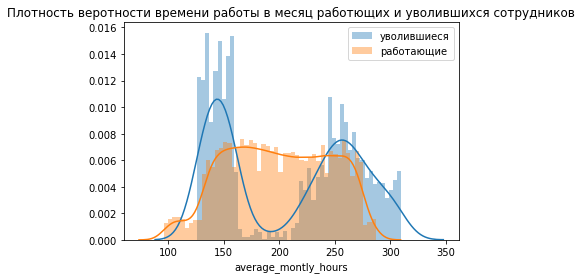

In [327]:
# проверим гипотезу, что уволившиеся сотрудники слишком много работали (average_montly_hours)
# нулевая гипотеза - выборки среднего количества выработаных в месяц часов уволившихся сотрудников и работающий  - одинаковы. То есть оценка не связана с увольнением.
# альтернативная гипотеза - выборкисреднего количества выработаных в месяц часов уволившихся сотрудников и работающий статистически не схожи (средние значения не совпадают).
left_wl = df[df['left'] == 1]['average_montly_hours']
onboard_wl = df[df['left'] == 0]['average_montly_hours']
print('Среднее время работы в часах у уволившихся сотрудников: ', left_wl.mean())
print('Среднее время работы в часах у уволившихся сотрудников: ', onboard_wl.mean())
print('\nРезультаты  U-критерия для выборок месячной часовой нагрузки для уволившихся и работающих: ', stats.mannwhitneyu(left_wl, onboard_wl, use_continuity=True, alternative='two-sided'))
print('Результаты  t-критерия для выборок месячной часовой нагрузки для уволившихся и работающих: ', stats.ttest_ind(left_wl, onboard_wl))
sns.distplot(left_wl, 50)
sns.distplot(onboard_wl, 50)
plt.title('Плотность веротности времени работы в месяц работющих и уволившихся сотрудников')
plt.legend(['уволившиеся', 'работающие'])

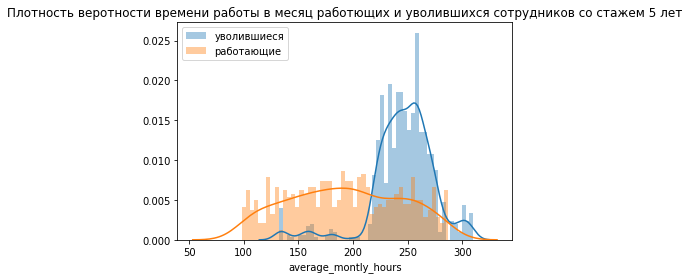

In [336]:
left_wl5 = df[(df['left'] == 1) & (df['time_spend_company'] == 5)].loc[:,['average_montly_hours','time_spend_company']]
onboard_wl5 = df[(df['left'] == 0) & (df['time_spend_company'] == 5)].loc[:,['average_montly_hours','time_spend_company']]
sns.distplot(left_wl5['average_montly_hours'], 50)
sns.distplot(onboard_wl5['average_montly_hours'], 50)
plt.title('Плотность веротности времени работы в месяц работющих и уволившихся сотрудников со стажем 5 лет')
plt.legend(['уволившиеся', 'работающие'])

Количество уволившихся сотрудников со стажем 3 года:  1586


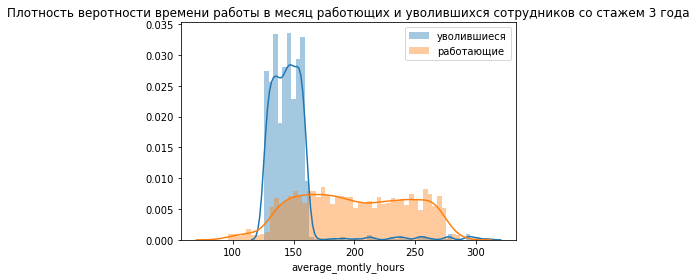

In [344]:
left_wl3 = df[(df['left'] == 1) & (df['time_spend_company'] == 3)].loc[:,['average_montly_hours','time_spend_company', 'sales', 'salary', 'employees']]
onboard_wl3 = df[(df['left'] == 0) & (df['time_spend_company'] == 3)].loc[:,['average_montly_hours','time_spend_company', 'sales', 'salary', 'employees']]
sns.distplot(left_wl3['average_montly_hours'], 50)
sns.distplot(onboard_wl3['average_montly_hours'], 50)
plt.title('Плотность веротности времени работы в месяц работющих и уволившихся сотрудников со стажем 3 года')
plt.legend(['уволившиеся', 'работающие'])
print('Количество уволившихся сотрудников со стажем 3 года: ', left_wl3['time_spend_company'].count())

In [347]:
#таблица показывает распределение по отделам и зарплатам. видно что ни то ни другое ярко выраженно не влияет на увольнение
left_wl3.groupby(['sales', 'salary']).agg('count').loc[:, ['employees']]

Вывод: сотрудники, работавшие более 200 часов подвержены быстрому выгоранию на работе. Средние результаты выборок статистически занчимы, о чем говорит p-value<0.05. Уволившиеся работники со стажем работы 4-6 лет самая опасная категория, так как их среднемесячное время работы составляет 240-270 часов. 
Также вижно, что сотрудники со стажем 3 года, работя от 120 до 160 часов в месяц также увольняются. это нижний левый квадрат на на графике ниже. можно сделать предположение, что отработав 3 года, сотрдуники разочаровали и уволились или им помогли увольиться. об этом говорят низкий уровень удовлевторенности и низкий уровень оценки работы сотрдуника.

Text(0, 0.5, 'Средняя месячная выработка сотрудника')

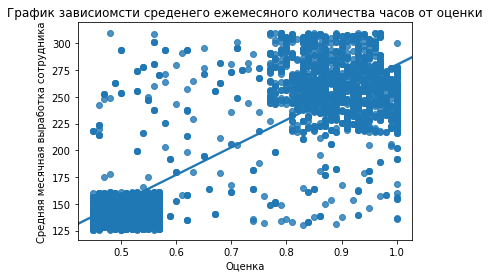

In [297]:
#sns.regplot(x = work_ev, y = work_wl, fit_reg=True).set(title = 'График зависиомсти среденего ежемесяного количества часов от оценки', xlabel = 'Оценка', ylabel = 'Количество часов' )
#plt.xlabel('Оценка сотрдуника')
#plt.ylabel('Средняя месячная выработка сотрудника')
left_sat = df[(df['left'] == 1)]['last_evaluation']
sns.regplot(x = left_sat, y = left_wl, fit_reg=True).set(title = 'График зависиомсти среденего ежемесяного количества часов от оценки', xlabel = 'Оценка', ylabel = 'Количество часов' )
plt.xlabel('Оценка')
plt.ylabel('Средняя месячная выработка сотрудника')

Рассмотрим есть ли влияние в зависимости от стажа:

In [313]:
dept = df.groupby('time_spend_company').agg('sum').loc[:, ['employees', 'left']]
dept['ratio']= dept.left/dept.employees
dept.sort_values(by = ['ratio'], ascending=False)

,employees,left,ratio
time_spend_company,,,
5,1473,833,0.565513
4,2557,890,0.348064
6,718,209,0.291086
3,6443,1586,0.246159
2,3244,53,0.016338
7,188,0,0.000000
8,162,0,0.000000
10,214,0,0.000000


компанию покидают сотрудники, проработавшие от 2-6 лет (96% среди вариаций по стажу). Причем доля уволившихся проработавших 4 -5 лет заметно выделяется (5ти летних сотудников уволилось 56%) на фоне другого стажа. Заметно меньшая доля сотрдуников увольняется во второй год.

In [ ]:
Рассмотрим есть ли влияние в зависимости от отдела:

In [249]:
dept = df.groupby('sales').agg('sum').loc[:, ['employees', 'left']]
dept['ratio']= dept.left/dept.employees
dept.sort_values(by = ['ratio'], ascending=False)

,employees,left,ratio
sales,,,
hr,739,215,0.290934
accounting,767,204,0.265971
technical,2720,697,0.256250
support,2229,555,0.248991
sales,4140,1014,0.244928
marketing,858,203,0.236597
IT,1227,273,0.222494
product_mng,902,198,0.219512
RandD,787,121,0.153748


больше всего увольняется людей в HR, бухгалтерии. меньше всего в RND и менеджменте, но там не большая численность сотрудников.

In [312]:
#проверим как влияет зарплата
dept = df.groupby(['sales', 'salary']).agg('sum').loc[:, ['employees', 'left']]
dept['ratio']= dept.left/dept.employees
#dept.sort_values(by = ['ratio'], ascending=False)
dept

employees  left     ratio
sales       salary                           
IT          high           83     4  0.048193
            low           609   172  0.282430
            medium        535    97  0.181308
RandD       high           51     4  0.078431
            low           364    55  0.151099
            medium        372    62  0.166667
accounting  high           74     5  0.067568
            low           358    99  0.276536
            medium        335   100  0.298507
hr          high           45     6  0.133333
            low           335    92  0.274627
            medium        359   117  0.325905
management  high          225     1  0.004444
            low           180    59  0.327778
            medium        225    31  0.137778
marketing   high           80     9  0.112500
            low           402   126  0.313433
            medium        376    68  0.180851
product_mng high           68     6  0.088235
            low           451   105  0.232816
            medium        383    87  0.227154
sales       high          269    14  0.052045
            low          2099   697  0.332063
            medium       1772   303  0.170993
support     high          141     8  0.056738
            low          1146   389  0.339442
            medium        942   158  0.167728
technical   high          201    25  0.124378
            low          1372   378  0.275510
            medium       1147   294  0.256321

In [338]:
#проверим как влияет зарплата
dept = df.groupby(['time_spend_company', 'salary']).agg('sum').loc[:, ['employees', 'left']]
dept['ratio']= dept.left/dept.employees
#dept.sort_values(by = ['ratio'], ascending=False)
dept

employees  left     ratio
time_spend_company salary                           
2                  high          303     0  0.000000
                   low          1527    22  0.014407
                   medium       1414    31  0.021924
3                  high          520    46  0.088462
                   low          3205   986  0.307644
                   medium       2718   554  0.203826
4                  high          173    16  0.092486
                   low          1300   541  0.416154
                   medium       1084   333  0.307196
5                  high           66    20  0.303030
                   low           799   488  0.610763
                   medium        608   325  0.534539
6                  high           55     0  0.000000
                   low           333   135  0.405405
                   medium        330    74  0.224242
7                  high           38     0  0.000000
                   low            36     0  0.000000
                   medium        114     0  0.000000
8                  high           18     0  0.000000
                   low            60     0  0.000000
                   medium         84     0  0.000000
10                 high           64     0  0.000000
                   low            56     0  0.000000
                   medium         94     0  0.000000

Если смотреть в целом по компании, то больше всего доля уволившихся в категрии низкой зарплаты - 30%. Хотя и в категории средней зарплаты тоже довольно-таки много уволивишхся.
IT, management, marketing, sales, support - бегут из-за низкой зарплаты.
Accounting, HR (видимо из-за большой текучки много рекрутинговой работы), technical, product_mng - при среднем уровне зарплаты возможно перегружены. Возможно средний уровень зарплаты, на самом деле на рынке низкий.

In [260]:
#посмотрим как влияет продвижение по карьерной лестнице на увольнения
dept = df.groupby(['time_spend_company', 'promotion_last_5years']).agg('sum').loc[:, ['employees', 'left']]
dept['ratio']= dept.left/dept.employees
#dept.sort_values(by = ['ratio'], ascending=False)
dept

employees  left     ratio
time_spend_company promotion_last_5years                           
2                  0                           3190    53  0.016614
                   1                             54     0  0.000000
3                  0                           6309  1571  0.249009
                   1                            134    15  0.111940
4                  0                           2522   887  0.351705
                   1                             35     3  0.085714
5                  0                           1456   832  0.571429
                   1                             17     1  0.058824
6                  0                            701   209  0.298146
                   1                             17     0  0.000000
7                  0                            152     0  0.000000
                   1                             36     0  0.000000
8                  0                            152     0  0.000000
                   1                             10     0  0.000000
10                 0                            198     0  0.000000
                   1                             16     0  0.000000

Из таблицы видно, что с ростом стажа сотрдуника доля увольняющихся сотрудников увеличивается. Пик наблюдается на 5 год - 57% При этом, если сотрудник повыша повышение, то только 5-10% таких сотрдуников увольнялись, что говрит о том, что продвижение в карьере положительно сказывается на удержании сотрудника в компании

In [264]:
dept = df.groupby(['salary']).agg('sum').loc[:, ['employees', 'left']]
dept['ratio']= dept.left/dept.employees
#dept.sort_values(by = ['ratio'], ascending=False)
dept

,employees,left,ratio
salary,,,
high,1237,82,0.066289
low,7316,2172,0.296884
medium,6446,1317,0.204313


Виден тренд зависиомсти зарплаты и доля увольвшихся сотрудников. чем ниже зарплата, тем больше доля уволившихся сотрудников